# Choppiness Indexのデモ

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import talib
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 指標を計算する関数の定義

In [2]:
def choppiness_index(data, period=14):
    # Calculate the True Range
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift(1))
    low_close = np.abs(data['Low'] - data['Close'].shift(1))
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    # Sum of the True Range over the given period
    atr = true_range.rolling(window=period).sum()
    # Calculate the difference between the highest high and lowest low over the period
    max_high = data['High'].rolling(window=period).max()
    min_low = data['Low'].rolling(window=period).min()
    # Calculate the Choppiness Index
    chop = 100 * np.log10(atr / (max_high - min_low)) / np.log10(period)
    return chop

## 株価データの読み込み

In [3]:
ticker = '9432.T'
end_date = datetime.today()
start_date = end_date - timedelta(days=730)
data = yf.download(ticker, start_date, end_date)
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

[*********************100%***********************]  1 of 1 completed


In [4]:
data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-24,150.800003,152.199997,150.600006,151.300003,154568400
2025-01-27,153.000000,153.600006,151.100006,151.399994,199461600
2025-01-28,153.899994,154.800003,152.300003,153.600006,185626100
2025-01-29,153.199997,154.100006,152.899994,153.399994,133472900
2025-01-30,152.300003,153.399994,151.899994,153.199997,37319200


## 指標の計算

In [5]:
# Calculate the Choppiness Index and ADX
data['CHOP'] = choppiness_index(data)
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
# Drop any NaN values from rolling calculations
data.dropna(inplace=True)

## チャートの描画

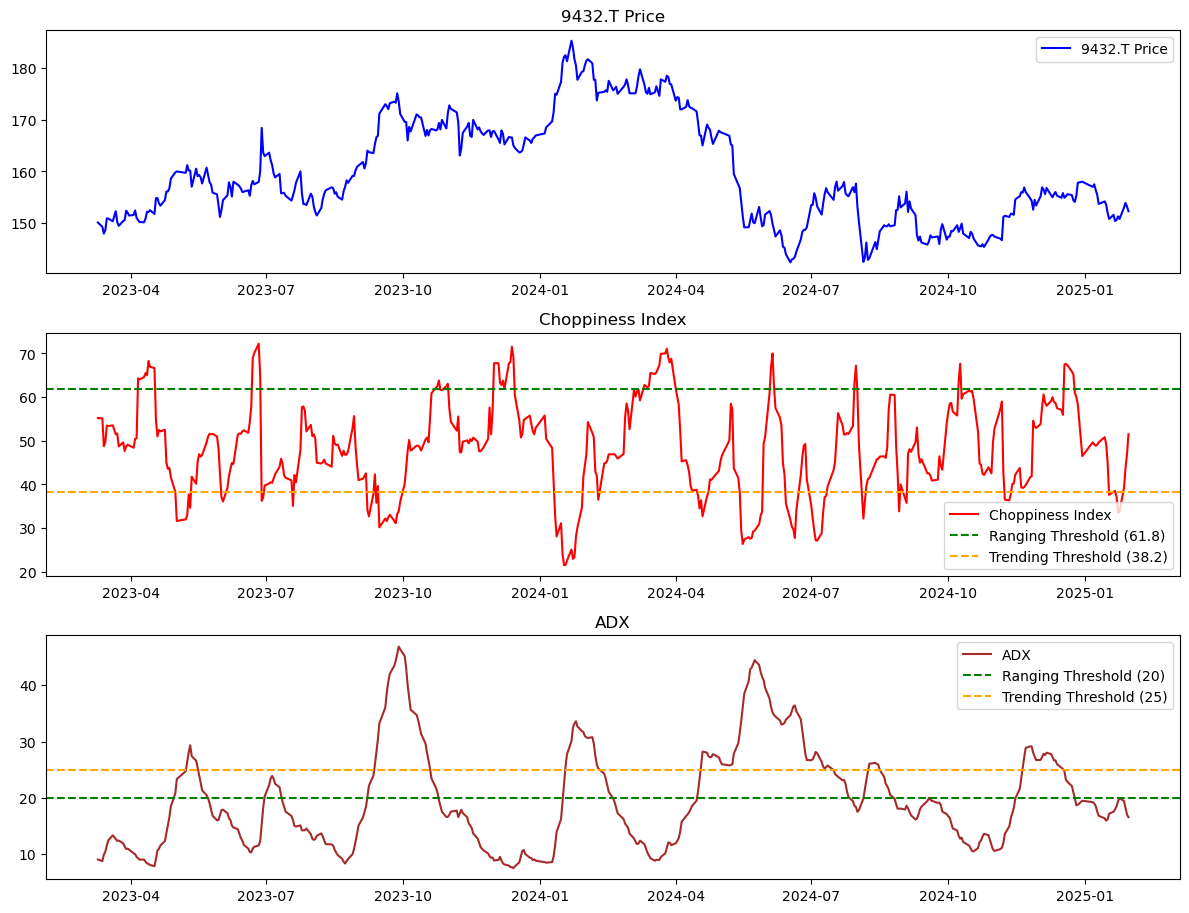

In [6]:
# Plot the Choppiness Index and ADX
plt.figure(figsize=(12, 9))
# Plot the price chart
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=f'{ticker} Price', color='blue')
plt.title(f'{ticker} Price')
plt.legend()
# Plot the Choppiness Index
plt.subplot(3, 1, 2)
plt.plot(data['CHOP'], label='Choppiness Index', color='red')
plt.axhline(y=61.8, color='green', linestyle='--', label='Ranging Threshold (61.8)')
plt.axhline(y=38.2, color='orange', linestyle='--', label='Trending Threshold (38.2)')
plt.title('Choppiness Index')
plt.legend()
plt.tight_layout()
# Plot the ADX
plt.subplot(3, 1, 3)
plt.plot(data['ADX'], label='ADX', color='brown')
plt.axhline(y=20, color='green', linestyle='--', label='Ranging Threshold (20)')
plt.axhline(y=25, color='orange', linestyle='--', label='Trending Threshold (25)')
plt.title('ADX')
plt.legend()
plt.savefig('ds250130a.png')
#plt.show()